# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [ ]:
data = pd.read_csv("maternal.csv")

In [ ]:
data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
#Features que vão até antes do limite da última coluna
#Se tenho 5 colunas, pego todas até a quarta
X = data.iloc[:,:-1].values 
#Pegando apenas a ultima coluna
y = data.iloc[:, -1].values

print(y)




['high risk' 'high risk' 'high risk' ... 'high risk' 'high risk'
 'mid risk']


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
#Criando instância do imputer para normalização de dados pela média
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
print(data.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


## Encoding categorical data

### Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

typeRisk = data.iloc[:, -1].unique()
print(typeRisk)
print( le.fit_transform(typeRisk))


['high risk' 'low risk' 'mid risk']
[0 1 2]


# Remove Outliers

**O que são outliers?**

Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

**Como identificar os Outliers?**



*   Análise Quantitativa

  *   Z-Score
  *   Amplitude Interquartil

*   Análise Qualitativa 
  *   scatter plot
  *   box plot 










**Identificando Outlier com Z- Score**

O z-score nos dá uma idéia do quanto um determinado ponto está afastado da média dos dados.
Mede quantos desvios padrão abaixo ou acima da média populacional os dados estão
 
Onde:
\begin{equation*}
\large
z = 
\frac{x -  \mu}{\sigma} 
\end{equation*}

x: observação

𝜇: média

𝜎: desvio padrão


**Distribuição Normal**

Quanto mais longe o Z-score de uma observação está de zero, mais incomum ele é. Um valor de corte padrão para encontrar outliers são escores Z de +/- 3 ou mais longe de zero. A distribuição de probabilidade abaixo exibe a distribuição dos escores Z em uma distribuição normal padrão. Os escores Z além de +/- 3 são tão extremos que você mal consegue ver o sombreamento sob a curva.

In [ ]:
outliers=[]

def find_outliers(data_set):
    corte_dp =3
    media = np.mean(data_set)
    dp =np.std(data_set)
  
    for dado in data_set:
        
        z_score = (dado - media)/dp 
        if np.abs(z_score) > corte_dp:
            outliers.append(dado)
            
    #print('Os outliers são: ', outliers)
    
    return outliers
outliersBodyTemp = find_outliers(data['BodyTemp'])
outliersHearthRate = find_outliers(data['HeartRate'])
outliersBodyTemp
outliersHearthRate

[103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 103.0,
 7,
 7]

In [ ]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt


<Axes: ylabel='Frequency'>

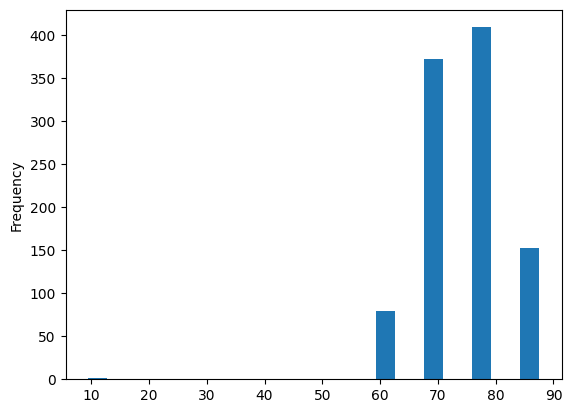

In [ ]:
data['HeartRate'].plot.hist(rwidth=0.4)

<Axes: ylabel='Frequency'>

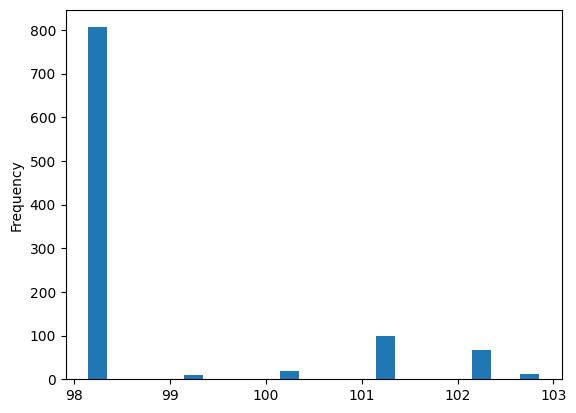

In [ ]:
data['BodyTemp'].plot.hist(rwidth=0.4)

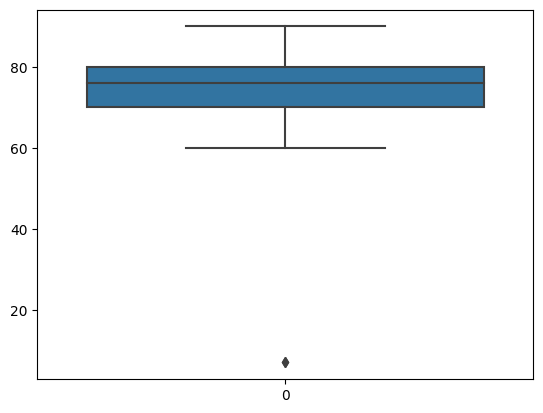

In [ ]:
#Boxplot: gráfico utilizado para avaliar a distribuição empírica do dados
ax = sns.boxplot(data['HeartRate'])

In [ ]:
data.drop(np.where(data["HeartRate"].isin(outliers))[0], inplace=True)


In [ ]:
data.shape

(1012, 7)

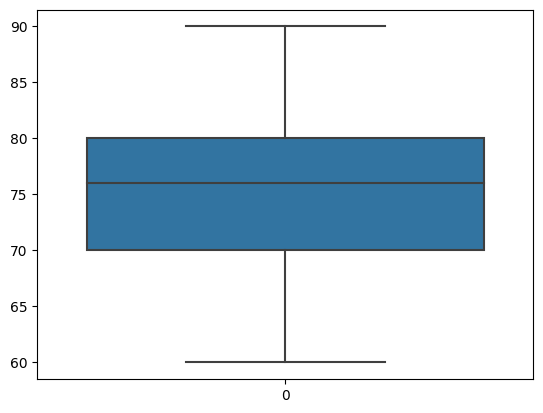

In [ ]:
ax = sns.boxplot(data['HeartRate'])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42, 
                                                 stratify=y, shuffle=True)

In [ ]:
print(X_train)

[[ 21.   90.   65.    6.9  98.   76. ]
 [ 48.  120.   80.   11.   98.   88. ]
 [ 18.   85.   60.    7.5 101.   86. ]
 ...
 [ 24.  120.   80.    7.5  98.   66. ]
 [ 17.   85.   60.    6.3 102.   86. ]
 [ 35.  100.   70.    6.9  98.   60. ]]


In [ ]:
print(X_test)

[[ 33.  115.   65.    7.   98.   70. ]
 [ 30.  120.   80.    6.9 101.   76. ]
 [ 35.  100.   60.   15.   98.   80. ]
 ...
 [ 34.  120.   75.    8.   98.   70. ]
 [ 23.  120.   80.    7.5  98.   70. ]
 [ 50.  120.   80.    7.7  98.   70. ]]


In [ ]:
print(y_train)

[1 0 2 1 1 2 1 1 1 2 1 2 2 0 1 2 0 2 0 1 0 2 2 2 1 1 0 1 2 1 2 1 2 1 1 2 1
 2 2 1 0 1 0 1 1 0 1 2 1 0 1 1 2 1 1 1 1 0 1 1 0 2 2 1 2 2 1 0 2 2 1 1 0 2
 2 0 2 2 2 1 0 1 2 2 0 2 2 0 2 1 0 1 2 2 1 2 2 1 1 1 2 2 1 1 2 1 1 0 1 1 2
 1 1 2 1 1 1 2 2 2 1 2 0 2 0 2 2 1 2 1 2 1 1 1 2 2 1 1 1 2 0 1 1 0 1 2 2 1
 2 0 1 1 1 1 1 0 2 0 1 2 1 0 1 0 0 2 2 1 2 1 1 1 1 1 2 1 0 0 1 1 2 1 2 1 0
 1 0 1 2 0 0 0 2 1 1 0 0 0 0 1 1 2 2 1 0 0 0 2 2 2 0 1 1 2 0 0 1 0 1 1 1 0
 0 0 2 0 1 1 0 1 2 2 1 0 0 1 1 0 0 1 1 0 1 2 2 0 2 0 2 1 1 0 2 2 0 1 2 2 2
 0 1 1 0 0 1 0 1 2 1 0 1 1 2 1 2 1 2 0 0 0 1 1 1 2 2 0 1 1 1 2 2 0 1 2 1 0
 1 1 0 2 1 2 0 2 1 1 1 1 1 1 0 1 2 1 2 1 2 2 0 0 2 0 1 1 1 1 0 1 1 2 2 2 1
 1 2 1 2 1 1 1 1 0 1 2 2 2 2 2 2 2 1 0 0 1 1 1 1 0 1 1 2 0 1 0 1 2 1 1 2 0
 1 2 2 1 1 1 2 0 1 0 0 1 2 2 0 1 2 2 1 2 1 0 2 1 2 0 1 2 1 2 0 2 1 1 1 0 2
 1 2 0 0 1 0 1 0 0 0 2 0 1 2 2 1 2 0 1 0 2 1 1 0 0 2 1 1 2 2 2 2 0 1 2 1 2
 1 1 0 0 2 2 1 1 1 2 0 2 0 2 2 1 0 2 1 2 2 0 1 0 2 1 2 0 0 0 0 2 1 2 1 0 1
 1 2 2 1 0 0 1 2 1 2 0 2 

In [ ]:
print(y_test)

[2 2 0 2 1 2 1 0 0 2 1 0 1 2 0 0 1 2 0 2 2 1 1 2 2 1 2 1 2 1 2 0 2 1 2 0 1
 0 1 2 0 0 1 0 1 1 2 1 2 1 2 1 2 0 1 2 1 2 1 2 1 1 2 1 0 2 2 1 0 1 2 1 1 2
 2 2 1 1 2 2 1 1 1 2 1 1 0 0 1 2 0 1 1 2 0 2 1 2 2 1 1 1 0 0 0 0 0 0 2 0 2
 2 1 0 0 1 2 1 0 1 0 1 2 1 2 1 2 1 1 2 1 0 2 2 1 1 2 0 1 2 0 2 2 2 0 1 2 0
 0 0 2 2 1 1 0 2 1 0 1 1 2 2 0 1 0 1 1 0 2 1 0 1 1 2 1 1 1 1 0 1 1 0 1 0 1
 0 1 1 1 0 0 0 2 0 2 1 2 1 0 1 1 0 0 1 2 1 0 2 0 2 2 2 2 0 2 1 0 0 2 1 2 2
 2 0 1 1 2 1 0 1 2 1 0 2 1 0 1 2 1 1 0 0 1 1 2 0 2 1 0 2 1 1 2 1]


## Feature Scaling

[Como aplicar o feature scaling](https://www.linkedin.com/pulse/feature-scaling-para-machine-learning-diferen%C3%A7a-entre-monier-jr-/?originalSubdomain=pt)


Nesse contexto, não preciso aplicar já que a escala das features não tem tanta discrepância


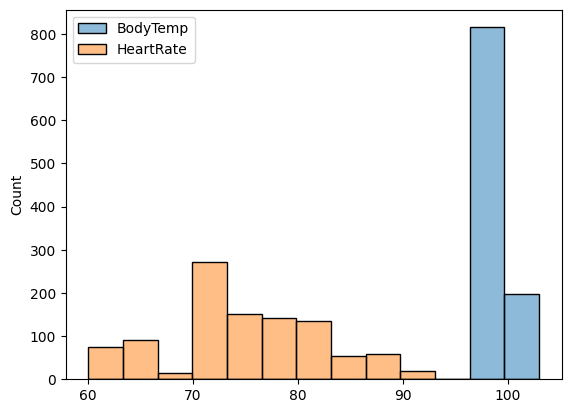

In [ ]:
ax = sns.histplot(data.iloc[: ,-3:])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59  1  8]
 [ 1 85 16]
 [ 2 11 71]]


0.8464566929133859

In [ ]:
cr = classification_report(y_test, y_pred)
print("Classification report")
print(cr)

Classification report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        68
           1       0.88      0.83      0.85       102
           2       0.75      0.85      0.79        84

    accuracy                           0.85       254
   macro avg       0.86      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254

